In [2]:
from common import NWSL, Data, Colors, Fonts, Images, add_signature
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse

In [3]:
season = "2025"

In [4]:
df = Data.get_nwsl_matches(season)
df = df[~df["is_playoffs"]]
df

,date,time,season,home,away,home_score,away_score,home_penalty_score,away_penalty_score,home_xg,away_xg,referee,attendance,stadium,is_forfeit,is_extra_time,is_pks,is_playoffs
1472,2025-03-14,19:00,2025,HOU,WAS,1,2,0.0,0.0,1.0,1.4,Matthew Thompson,7671.0,Shell Energy Stadium,False,False,False,False
1473,2025-03-14,20:00,2025,ORL,CHI,6,0,0.0,0.0,2.1,1.1,Shawn Tehini,19237.0,Inter&Co Stadium,False,False,False,False
1474,2025-03-15,11:45,2025,KCC,POR,3,1,0.0,0.0,1.9,1.2,Alyssa Nichols,11500.0,CPKC Stadium,False,False,False,False
1475,2025-03-15,17:30,2025,UTA,BAY,1,1,0.0,0.0,1.0,0.8,Jaclyn Metz,10624.0,America First Field,False,False,False,False
1476,2025-03-15,19:00,2025,RGN,GFC,1,1,0.0,0.0,0.7,1.4,Alex Billeter,8467.0,Lumen Field,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,2025-11-02,15:00,2025,UTA,WAS,1,0,0.0,0.0,1.0,0.5,Alex Billeter,9170.0,America First Field,False,False,False,False
1650,2025-11-02,16:00,2025,CHI,LA,2,1,0.0,0.0,2.3,1.1,NaN,4219.0,SeatGeek Stadium,False,False,False,False
1651,2025-11-02,17:00,2025,ORL,RGN,1,1,0.0,0.0,1.2,0.3,Brad Jensen,NaN,Inter&Co Stadium,False,False,False,False
1652,2025-11-02,17:00,2025,NC,GFC,3,2,0.0,0.0,2.5,2.2,Abdou Ndiaye,11170.0,First Horizon Stadium at WakeMed Soccer ...,False,False,False,False


In [5]:
midseason = date(2025, 7, 1)

In [11]:
df_first = df[df["date"].dt.date < midseason]

In [12]:
df_second = df[df["date"].dt.date > midseason]

In [8]:
table_first = Data.get_nwsl_standings(df_first)
table_first

,team,wins,draws,losses,goals_for,goals_against,goals_diff,points
1,KCC,11,0,2,29,10,19,33
2,ORL,8,1,4,20,10,10,25
3,SD,7,3,3,25,16,9,24
4,WAS,7,2,4,21,19,2,23
5,POR,6,4,3,19,12,7,22
6,RGN,6,3,4,17,13,4,21
7,LOU,6,2,5,19,22,-3,20
8,GFC,5,3,5,18,13,5,18
9,NC,5,3,5,18,20,-2,18
10,BAY,4,3,6,14,17,-3,15


In [9]:
table_second = Data.get_nwsl_standings(df_second)
table_second

,team,wins,draws,losses,goals_for,goals_against,goals_diff,points
1,KCC,10,2,1,20,3,17,32
2,WAS,5,6,2,21,14,7,21
3,UTA,5,5,3,17,13,4,20
4,HOU,5,4,4,14,17,-3,19
5,GFC,4,6,3,17,12,5,18
6,POR,5,3,5,17,17,0,18
7,RGN,4,6,3,15,16,-1,18
8,NC,4,5,4,19,19,0,17
9,LOU,4,5,4,16,16,0,17
10,ORL,3,6,4,13,17,-4,15


<Figure size 1152x864 with 0 Axes>

<Figure size 16000x12000 with 0 Axes>

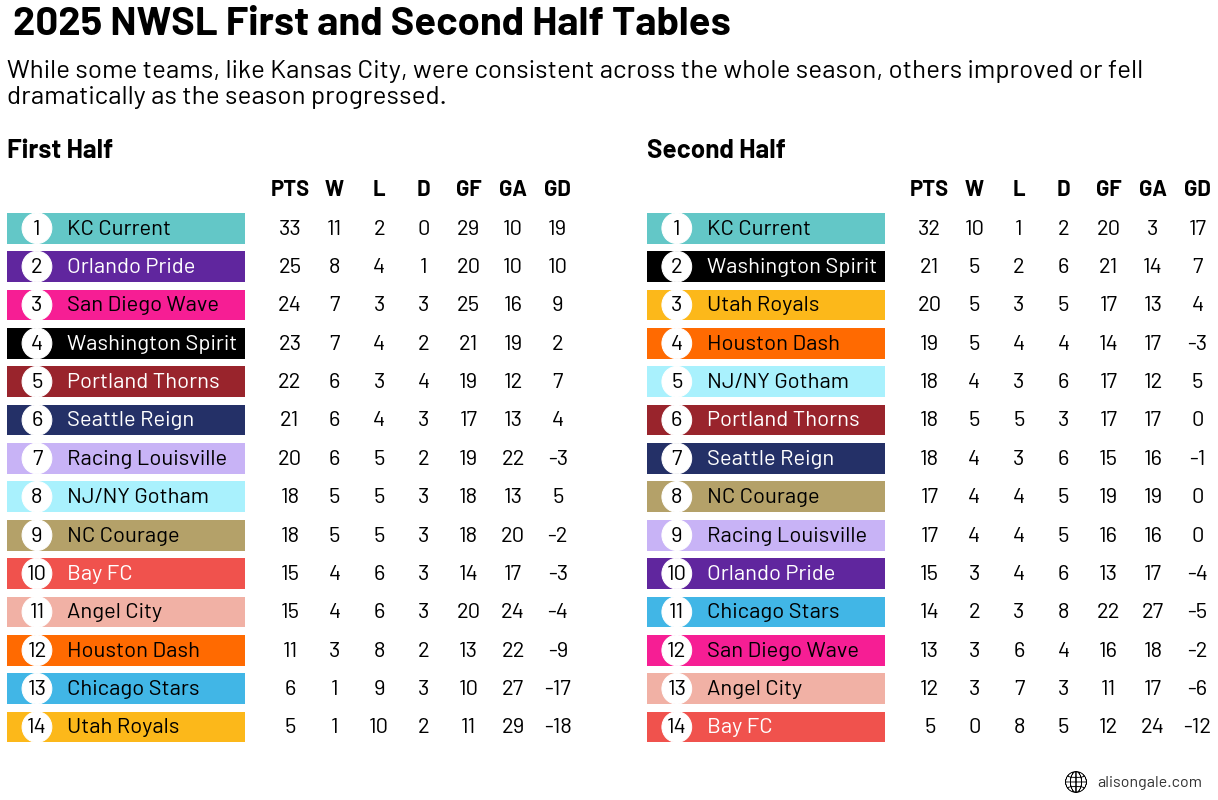

In [65]:
plt.clf()
plt.rcParams["figure.figsize"] = (16, 12)
plt.figure(dpi=1000, facecolor="white")
fig, ax = plt.subplots()
fig.patch.set_facecolor("white")

plt.xlim([0, 6])
plt.ylim([15, -2])
ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Width of the table cells
cw = 0.3
fs = 22

for table, x_offset in [(table_first, 0), (table_second, 4.3)]:

    # Plot the table headers
    for j, stat in enumerate(["PTS", "W", "L", "D", "GF", "GA", "GD"]):
        plt.text(
            x_offset+1.9 + j * cw,
            0,
            stat,
            color="black",
            fontsize=fs,
            fontproperties=Fonts.BARLOW_BOLD,
            ha="center",
        )

    # Plot the table data
    for i, row in table.iterrows():
        # Background color for team
        ax.add_patch(
            Rectangle((x_offset, i - 0.6 + 0.05), 1.6, 0.8, fc=NWSL.COLORS[row["team"]])
        )

        # Background circle for rank
        ax.add_patch(Ellipse((x_offset+0.2, i - 0.15), 0.2, 0.8, color="white"))

        # Team ramk
        plt.text(
            x_offset+0.2,
            i,
            str(i),
            color="black",
            fontsize=fs,
            fontproperties=Fonts.BARLOW,
            ha="center",
        )

        # Team name
        plt.text(
            x_offset+0.4,
            i,
            NWSL.NAMES[row["team"]],
            color=NWSL.TEXT_COLORS[row["team"]],
            fontsize=fs,
            fontproperties=Fonts.BARLOW,
            ha="left",
        )

        for j, stat in enumerate(["points", "wins", "losses", "draws", "goals_for", "goals_against", "goals_diff"]):
            plt.text(
                x_offset+1.9 + j * cw,
                i,
                row[stat],
                color="black",
                fontsize=fs,
                fontproperties=Fonts.BARLOW,
                ha="center",
            )
            
# Subtitle
ax.text(
    0,
    -1,
    "First Half",
    fontproperties=Fonts.BARLOW_BOLD,
    size=26,
    ha="left",
)

ax.text(
    4.3,
    -1,
    "Second Half",
    fontproperties=Fonts.BARLOW_BOLD,
    size=26,
    ha="left",
)
            
# Title
fig.suptitle(
    season + " NWSL First and Second Half Tables",
    fontproperties=Fonts.BARLOW_BOLD,
    size=40,
    ha="left",
    x=0.13,
    y=1.01,
)

# Subtitle
ax.text(
    0,
    -2.4,
    "While some teams, like Kansas City, were consistent across the whole season, others improved or fell\ndramatically as the season progressed.",
    fontproperties=Fonts.BARLOW,
    size=26,
    ha="left",
)

add_signature(fig, x=1.04, y=0.1, fs=16, w=0.025)

# Save image
plt.savefig("images/first_second_half_" + season + ".png", bbox_inches="tight", pad_inches=0.5)